In [1]:
# import libraries

import pandas as pd
import numpy as np

import os

# read image

from skimage import io, transform

# graphs

import matplotlib.pyplot as plt
import seaborn as sns

# tensorflow

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils

# model selection

from sklearn.model_selection import train_test_split

In [2]:
# read in the data

df = pd.read_csv('../data/final.csv')

print(df.shape)
df.head()

(15000, 8)


,suite_id,sample_id,code,value,character,file_names,width,height
0,1,1,10,9,九,input_1_1_10.jpg,64,64
1,1,10,10,9,九,input_1_10_10.jpg,64,64
2,1,2,10,9,九,input_1_2_10.jpg,64,64
3,1,3,10,9,九,input_1_3_10.jpg,64,64
4,1,4,10,9,九,input_1_4_10.jpg,64,64


In [3]:
# read in the image data

# create a files variable that contains image files

path = '../data/images/'
files = os.listdir(path)

files = [file for file in files if file.endswith('jpg')]
files[:10]

['input_69_2_7.jpg',
 'input_11_7_12.jpg',
 'input_81_4_10.jpg',
 'input_84_6_1.jpg',
 'input_36_3_3.jpg',
 'input_38_7_15.jpg',
 'input_3_1_15.jpg',
 'input_75_2_13.jpg',
 'input_17_8_2.jpg',
 'input_61_4_7.jpg']

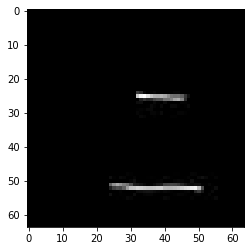

In [4]:
image = io.imread(path + files[4])    

plt.imshow(image, cmap = 'gray');

In [5]:
# train test split for training a model

train, test = train_test_split(df, 
                               test_size = 0.2,
                               random_state = 2020,
                               stratify = df['character'].values) 

In [6]:
# create image datasets for train and test
# read in the image and transform first, so that the values fit between 0 and 1

def img_df(df, path, img_size, n):
    
    images = []
    
    for file in df['file_names']:
        image = io.imread(path + file)
        image = transform.resize(image, (img_size, img_size, n))
        images.append(image)
        
    images = np.array(images)
    y = pd.get_dummies(df['character'])
    
    return images, y

X_train, y_train = img_df(train, path, 64, 1)
X_test, y_test = img_df(test, path, 64, 1)

In [13]:
X_train.shape

(12000, 64, 64, 1)

In [14]:
X_test.shape

(3000, 64, 64, 1)

In [15]:
y_train.shape

(12000, 15)

In [16]:
y_test.shape

(3000, 15)

### Models

In [7]:
# instantiate the model

model = Sequential()

# add layers

model.add(Conv2D(32, padding = 'same', 
                 kernel_size = 4,
                 input_shape = (64, 64, 1), activation = 'relu'))

model.add(Conv2D(16, padding = 'same', 
                 kernel_size = 4,
                 activation = 'relu'))

model.add(MaxPool2D(4))

model.add(Flatten())

model.add(Dense(15, 
                activation = 'softmax'))

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        544       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        8208      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 15)                61455     
Total params: 70,207
Trainable params: 70,207
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size = 64, 
                    epochs = 30, 
                    validation_data = (X_test, y_test))

Epoch 1/30
188/188 [==============================] - 44s 233ms/step - loss: 1.6799 - accuracy: 0.4857 - val_loss: 0.9803 - val_accuracy: 0.7013
Epoch 2/30
188/188 [==============================] - 45s 238ms/step - loss: 0.7208 - accuracy: 0.7778 - val_loss: 0.5922 - val_accuracy: 0.8103
Epoch 3/30
188/188 [==============================] - 44s 235ms/step - loss: 0.4798 - accuracy: 0.8522 - val_loss: 0.4586 - val_accuracy: 0.8607
Epoch 4/30
188/188 [==============================] - 43s 231ms/step - loss: 0.3638 - accuracy: 0.8875 - val_loss: 0.3771 - val_accuracy: 0.8887
Epoch 5/30
188/188 [==============================] - 44s 235ms/step - loss: 0.2820 - accuracy: 0.9146 - val_loss: 0.3400 - val_accuracy: 0.8987
Epoch 6/30
188/188 [==============================] - 45s 237ms/step - loss: 0.2349 - accuracy: 0.9298 - val_loss: 0.3159 - val_accuracy: 0.9043
Epoch 7/30
188/188 [==============================] - 44s 236ms/step - loss: 0.1981 - accuracy: 0.9378 - val_loss: 0.3045 - val_ac

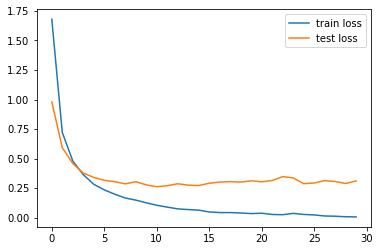

In [11]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.legend();

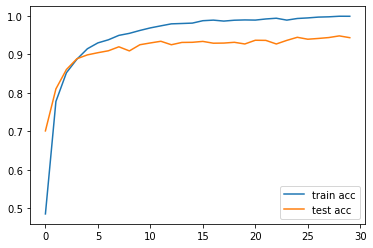

In [12]:
plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label = 'test acc')
plt.legend();

In [17]:
# instantiate the model

model2 = Sequential()

# add layers

model2.add(Conv2D(32, padding = 'same', 
                  kernel_size = 4,
                  input_shape = (64, 64, 1), activation = 'relu'))

model2.add(Conv2D(16, padding = 'same', 
                  kernel_size = 4,
                  activation = 'relu'))

model2.add(Dropout(0.3))

model2.add(MaxPool2D(4))

model2.add(Flatten())

model2.add(Dense(15, 
                 activation = 'softmax'))

model2.compile(optimizer = 'adam', 
               loss = 'categorical_crossentropy', 
               metrics = ['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        544       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 16)        8208      
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                61455     
Total params: 70,207
Trainable params: 70,207
Non-trainable params: 0
__________________________________________________

In [18]:
history2 = model2.fit(X_train, 
                      y_train, 
                      batch_size = 64, 
                      epochs = 30, 
                      validation_data = (X_test, y_test))

Epoch 1/30
188/188 [==============================] - 47s 251ms/step - loss: 1.5897 - accuracy: 0.5213 - val_loss: 0.9668 - val_accuracy: 0.7407
Epoch 2/30
188/188 [==============================] - 48s 253ms/step - loss: 0.7321 - accuracy: 0.7739 - val_loss: 0.7061 - val_accuracy: 0.7833
Epoch 3/30
188/188 [==============================] - 48s 256ms/step - loss: 0.4906 - accuracy: 0.8494 - val_loss: 0.5099 - val_accuracy: 0.8493
Epoch 4/30
188/188 [==============================] - 48s 255ms/step - loss: 0.3481 - accuracy: 0.8892 - val_loss: 0.4181 - val_accuracy: 0.8870
Epoch 5/30
188/188 [==============================] - 50s 267ms/step - loss: 0.2631 - accuracy: 0.9167 - val_loss: 0.3631 - val_accuracy: 0.8970
Epoch 6/30
188/188 [==============================] - 50s 265ms/step - loss: 0.2201 - accuracy: 0.9310 - val_loss: 0.3169 - val_accuracy: 0.9103
Epoch 7/30
188/188 [==============================] - 50s 267ms/step - loss: 0.1875 - accuracy: 0.9397 - val_loss: 0.3138 - val_ac

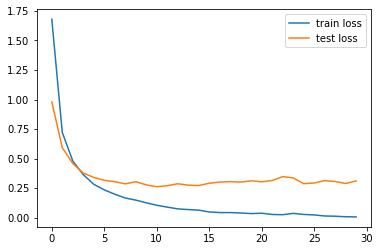

In [19]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.legend();

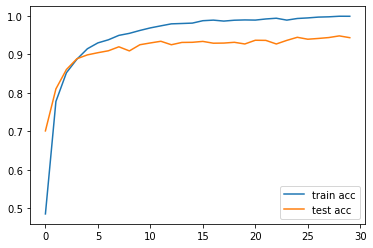

In [20]:
plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label = 'test acc')
plt.legend();